<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_2_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.4_n250.csv',
 'data_add_delta_-2.4_n120.csv',
 'data_add_delta_-2.4_n60.csv',
 'data_add_delta_-2.4_n30.csv',
 'data_add_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,83.725392,59.434673,-0.003852,153.156214,153.158240,-0.002026
1,0.0,1.0,92.916034,47.307491,-0.003887,150.219637,150.220684,-0.001047
2,0.0,2.0,87.741171,97.153024,-0.000016,194.894179,194.895286,-0.001108
3,0.0,3.0,69.318262,60.387768,-0.011699,139.694330,139.704383,-0.010053
4,0.0,4.0,50.631213,61.008597,-0.010745,121.629066,121.638350,-0.009284
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,84.349197,85.592821,0.004361,179.946379,179.943456,0.002923
249996,999.0,246.0,79.272827,26.719444,-0.004555,115.987715,115.992580,-0.004865
249997,999.0,247.0,68.536544,94.370694,0.000040,172.907278,172.908010,-0.000731
249998,999.0,248.0,69.314596,39.093542,-0.010510,118.397627,118.408129,-0.010501


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,83.725392,59.434673,-0.003852,153.156214,153.158240,-0.002026
1,0.0,1.0,92.916034,47.307491,-0.003887,150.219637,150.220684,-0.001047
2,0.0,2.0,87.741171,97.153024,-0.000016,194.894179,194.895286,-0.001108
3,0.0,3.0,69.318262,60.387768,-0.011699,139.694330,139.704383,-0.010053
4,0.0,4.0,50.631213,61.008597,-0.010745,121.629066,121.638350,-0.009284
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,84.349197,85.592821,0.004361,179.946379,179.943456,0.002923
249996,999.0,246.0,79.272827,26.719444,-0.004555,115.987715,115.992580,-0.004865
249997,999.0,247.0,68.536544,94.370694,0.000040,172.907278,172.908010,-0.000731
249998,999.0,248.0,69.314596,39.093542,-0.010510,118.397627,118.408129,-0.010501


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    83.725392  59.434673 -0.003852  153.156214  153.158240 -0.002026
      1.0    92.916034  47.307491 -0.003887  150.219637  150.220684 -0.001047
      2.0    87.741171  97.153024 -0.000016  194.894179  194.895286 -0.001108
      3.0    69.318262  60.387768 -0.011699  139.694330  139.704383 -0.010053
      4.0    50.631213  61.008597 -0.010745  121.629066  121.638350 -0.009284
...                ...        ...       ...         ...         ...       ...
999.0 245.0  84.349197  85.592821  0.004361  179.946379  179.943456  0.002923
      246.0  79.272827  26.719444 -0.004555  115.987715  115.992580 -0.004865
      247.0  68.536544  94.370694  0.000040  172.907278  172.908010 -0.000731
      248.0  69.314596  39.093542 -0.010510  118.397627  118.408129 -0.010501
      249.0  45.773058  38.457651 -0.004126   94.226583   94.229505 -0.002922

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    83.725392  59.434673 -0.003852  153.156214  153.158240 -0.002026
      1.0    92.916034  47.307491 -0.003887  150.219637  150.220684 -0.001047
      2.0    87.741171  97.153024 -0.000016  194.894179  194.895286 -0.001108
      3.0    69.318262  60.387768 -0.011699  139.694330  139.704383 -0.010053
      4.0    50.631213  61.008597 -0.010745  121.629066  121.638350 -0.009284
...                ...        ...       ...         ...         ...       ...
999.0 245.0  84.349197  85.592821  0.004361  179.946379  179.943456  0.002923
      246.0  79.272827  26.719444 -0.004555  115.987715  115.992580 -0.004865
      247.0  68.536544  94.370694  0.000040  172.907278  172.908010 -0.000731
      248.0  69.314596  39.093542 -0.010510  118.397627  118.408129 -0.010501
      249.0  45.773058  38.457651 -0.004126   94.226583   94.229505 -0.002922

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,83.725392,59.434673,-0.003852,153.156214,153.158240,-0.002026
1,0.0,1.0,92.916034,47.307491,-0.003887,150.219637,150.220684,-0.001047
2,0.0,2.0,87.741171,97.153024,-0.000016,194.894179,194.895286,-0.001108
3,0.0,3.0,69.318262,60.387768,-0.011699,139.694330,139.704383,-0.010053
4,0.0,4.0,50.631213,61.008597,-0.010745,121.629066,121.638350,-0.009284
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,84.349197,85.592821,0.004361,179.946379,179.943456,0.002923
249996,999.0,246.0,79.272827,26.719444,-0.004555,115.987715,115.992580,-0.004865
249997,999.0,247.0,68.536544,94.370694,0.000040,172.907278,172.908010,-0.000731
249998,999.0,248.0,69.314596,39.093542,-0.010510,118.397627,118.408129,-0.010501


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    83.725392  59.434673 -0.003852  153.156214  153.158240 -0.002026
      1.0    92.916034  47.307491 -0.003887  150.219637  150.220684 -0.001047
      2.0    87.741171  97.153024 -0.000016  194.894179  194.895286 -0.001108
      3.0    69.318262  60.387768 -0.011699  139.694330  139.704383 -0.010053
      4.0    50.631213  61.008597 -0.010745  121.629066  121.638350 -0.009284
...                ...        ...       ...         ...         ...       ...
999.0 245.0  84.349197  85.592821  0.004361  179.946379  179.943456  0.002923
      246.0  79.272827  26.719444 -0.004555  115.987715  115.992580 -0.004865
      247.0  68.536544  94.370694  0.000040  172.907278  172.908010 -0.000731
      248.0  69.314596  39.093542 -0.010510  118.397627  118.408129 -0.010501
      249.0  45.773058  38.457651 -0.004126   94.226583   94.229505 -0.002922

[250000 rows x 6 columns]

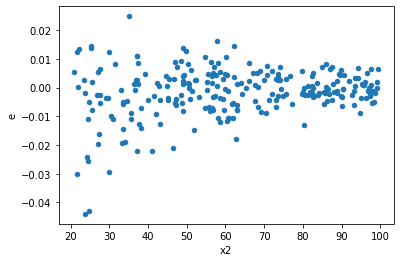

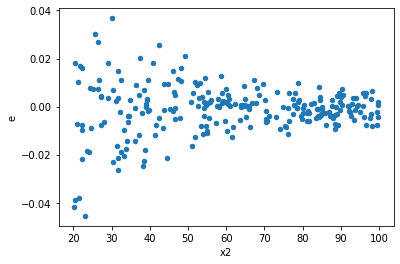

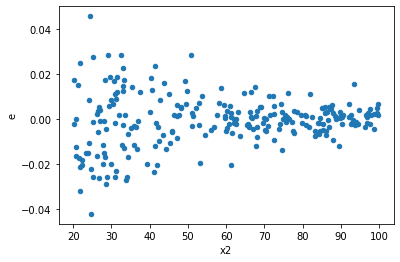

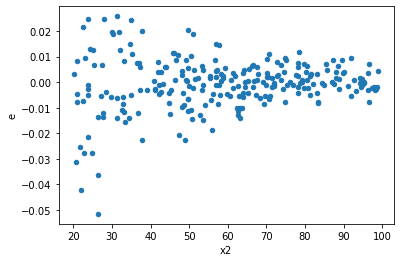

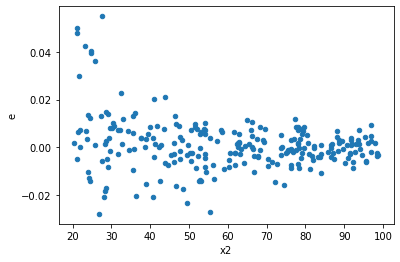

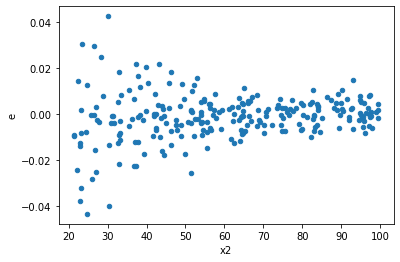

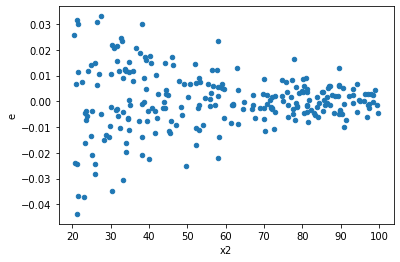

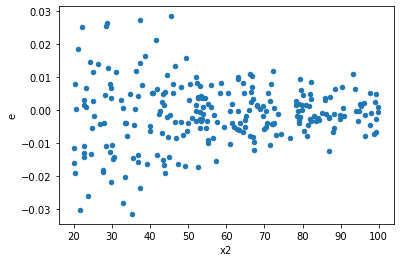

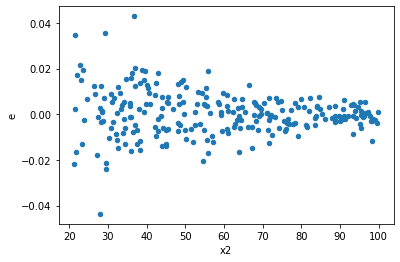

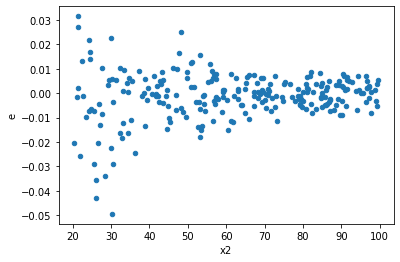

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,0.01139213010473834,0.0030441102666633178,0.00011624622555855448,3.106234965982977e-05,0.2672116837392138,2.9680288397026817e-10,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,0.01638861161361811,0.0034571527730183887,0.0001672307307512052,3.5277069112432534e-05,0.21094848389388085,2.1125404051678251e-13,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,0.018852738467180157,0.004365444042768175,0.00019237488231816486,4.4545347375185455e-05,0.2315549038336139,4.055140711036923e-12,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,0.0175119203356817,0.003102801015449742,0.00017869306464981329,3.1661234851527976e-05,0.17718222536266215,6.125880466190024e-16,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,0.018526298733061438,0.003111530897132369,0.0001890438646230759,3.175031527686091e-05,0.16795210646040332,9.456937862980579e-17,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,0.017750011051344397,0.003007324592832111,0.00018112256174841222,3.068698564114399e-05,0.16942663213746756,1.2862792205271487e-16,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,0.02324433563955804,0.003708912960706722,0.00023718709836283714,3.784605061945635e-05,0.1595620119335552,1.5305288954052373e-17,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,0.01538453619907254,0.0032958493405929397,0.00015698506325584224,3.363111572033612e-05,0.21423130980000754,3.475795430186145e-13,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,0.015036347188095458,0.004184104204238602,0.00015343211416423937,4.269494085957757e-05,0.2782660011702331,9.445605970782735e-10,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64